<a href="https://colab.research.google.com/github/OheneBoateng/HTM737-OHENE/blob/main/Week9_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt # import pyplot module for graphs

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/osoliman/Chapter6_HTM737/refs/heads/main/ESRD.csv')

In [5]:

df_filt = df[df['Total Performance Score'] != 'No Score'].copy()
df_filt['Total Performance Score'] = df_filt['Total Performance Score'].astype(int)

In [6]:

search_word = 'ownership'
for column in df.columns:
    if search_word in column.lower():
        print(column) # searches for 'ownership" in columns and displays said columns

Ownership as of December 31, 2016
Date of Ownership Record Update


In [7]:

df_filt['Ownership'] = df_filt['Ownership as of December 31, 2016']



In [8]:

owner_counts = df_filt['Ownership'].value_counts().head(10) #groups top ten ownerships with count in shorter way


In [9]:
owner_counts

,count
Ownership,
DAVITA,2384
FRESENIUS MEDICAL CARE,2285
NOT A CHAIN,754
"DIALYSIS CLINIC, INC.",230
AMERICAN RENAL ASSOCIATES,187
"US RENAL CARE, INC.",155
SATELLITE HEALTHCARE,60
DIVERSIFIED SPECIALTY INSTITUTES (DSI),52
OTHER,46


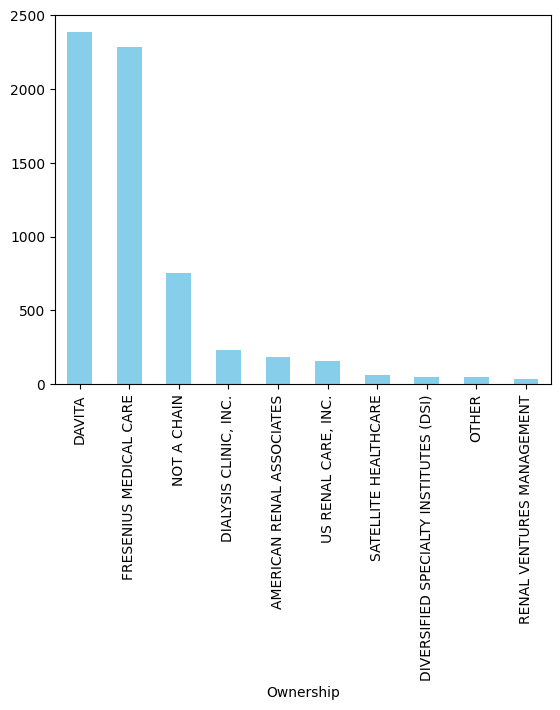

In [10]:

owner_counts.plot(kind='bar', color='skyblue') # converts table into graphby choosing kind and color
plt.show()#use to display graph


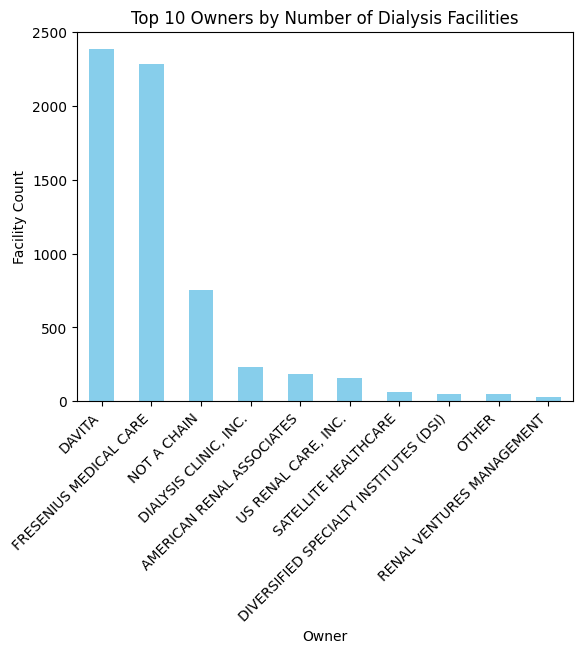

In [11]:
owner_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Owners by Number of Dialysis Facilities')  #title graph
plt.xlabel('Owner')#labels x axis owner
plt.ylabel('Facility Count')#labels y axis facility count
plt.xticks(rotation=45, ha='right') # cahanges to horizontal alignment
plt.show()



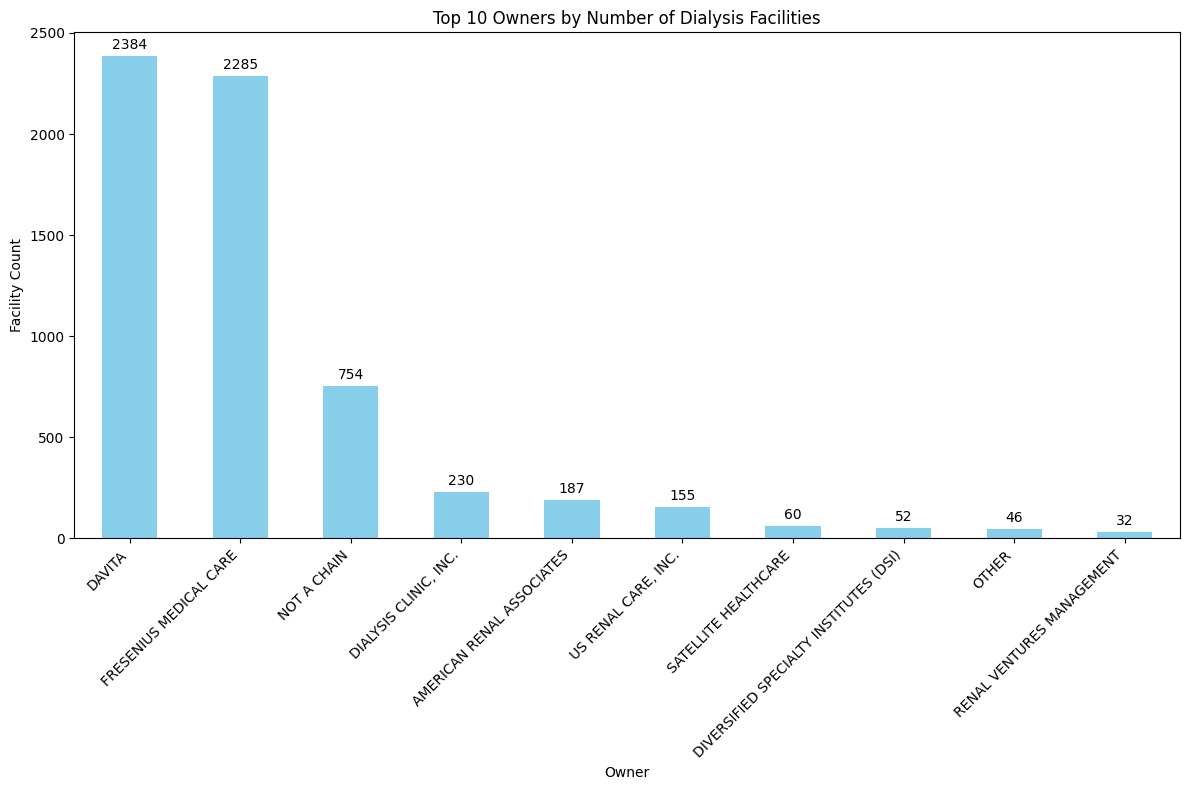

In [12]:

plt.figure(figsize=(12, 8))
ax = owner_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Owners by Number of Dialysis Facilities')
plt.xlabel('Owner')
plt.ylabel('Facility Count')
plt.xticks(rotation=45, ha='right')


ax.bar_label(ax.containers[0], labels=owner_counts.values, padding=3)#padding=3 adds 3 point gap between labels

plt.tight_layout()
plt.show()

In [13]:
owner_counts.head()
#previews 5 from owners_count.head

,count
Ownership,
DAVITA,2384
FRESENIUS MEDICAL CARE,2285
NOT A CHAIN,754
"DIALYSIS CLINIC, INC.",230
AMERICAN RENAL ASSOCIATES,187


In [14]:
owner_counts.index

Index(['DAVITA', 'FRESENIUS MEDICAL CARE', 'NOT A CHAIN',
       'DIALYSIS CLINIC, INC.', 'AMERICAN RENAL ASSOCIATES',
       'US RENAL CARE, INC.', 'SATELLITE HEALTHCARE',
       'DIVERSIFIED SPECIALTY INSTITUTES (DSI)', 'OTHER',
       'RENAL VENTURES MANAGEMENT'],
      dtype='object', name='Ownership')

In [15]:
#uses merge/join for top 10 fields
df_top10 = pd.merge(df_filt, owner_counts, left_on='Ownership', right_index=True)

<Figure size 1400x700 with 0 Axes>

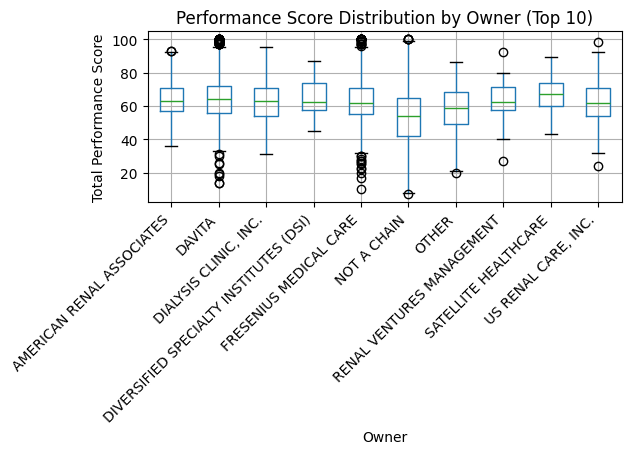

In [16]:
plt.figure(figsize=(14, 7))
df_top10.boxplot(column='Total Performance Score', by='Ownership')
plt.title('Performance Score Distribution by Owner (Top 10)')
plt.suptitle('')
plt.xlabel('Owner')
plt.ylabel('Total Performance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1400x700 with 0 Axes>

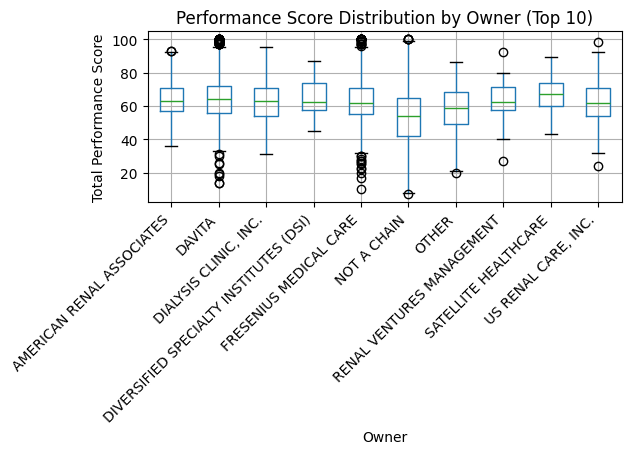

In [17]:

top10_owners = owner_counts.index
df_top10 = df_filt[df_filt['Ownership'].isin(top10_owners)]# utilizes isin in a cleaner way

plt.figure(figsize=(14, 7))
df_top10.boxplot(column='Total Performance Score', by='Ownership')# creates boxplot for top ten
plt.title('Performance Score Distribution by Owner (Top 10)')
plt.suptitle('')
plt.xlabel('Owner')
plt.ylabel('Total Performance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [19]:

avg_scores = df_top10.groupby('Ownership')['Total Performance Score'].mean()#mean total performance by ownership


In [20]:
avg_scores

,Total Performance Score
Ownership,
AMERICAN RENAL ASSOCIATES,63.529412
DAVITA,63.911493
"DIALYSIS CLINIC, INC.",62.821739
DIVERSIFIED SPECIALTY INSTITUTES (DSI),64.865385
FRESENIUS MEDICAL CARE,62.894530
NOT A CHAIN,53.397878
OTHER,57.456522
RENAL VENTURES MANAGEMENT,62.406250
SATELLITE HEALTHCARE,66.816667


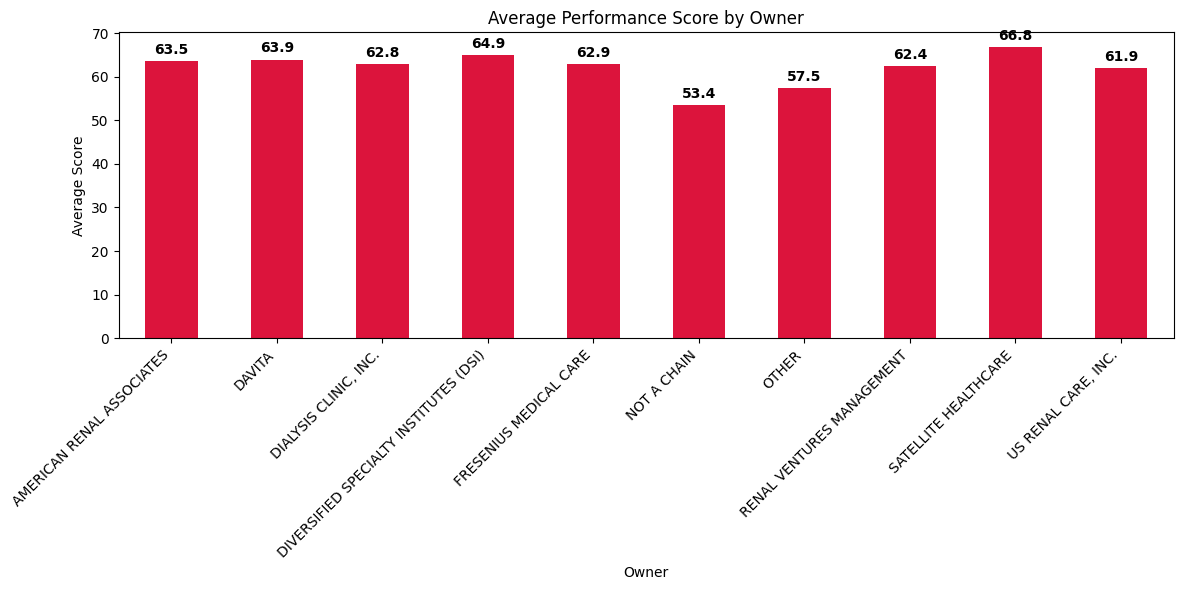

In [21]:
plt.figure(figsize=(12, 6))
ax = avg_scores.plot(kind='bar', color='crimson')
plt.title('Average Performance Score by Owner')
plt.xlabel('Owner')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')


ax.bar_label(ax.containers[0], fmt='%.1f', padding=3, fontweight='bold')#adds value and chooses font,spacing(paddding) etc

plt.tight_layout()
plt.show()

In [22]:

import seaborn as sns#import seaboarn library as sns

df_corr = df_filt[['Total Performance Score',
                   'VAT Catheter Measure Score',
                   'ICH CAHPS Measure Score',
                   'Vascular Access Combined Measure Score'
                   ]]
#selects needed fields

df_corr.dtypes



,0
Total Performance Score,int64
VAT Catheter Measure Score,object
ICH CAHPS Measure Score,object
Vascular Access Combined Measure Score,object


In [24]:
df_corr = df_corr.copy()
for column in df_corr.columns:
    df_corr[column] = pd.to_numeric(df_corr[column], errors='coerce')#converts to numeric and prevents warnings

df_corr.dtypes

,0
Total Performance Score,int64
VAT Catheter Measure Score,float64
ICH CAHPS Measure Score,float64
Vascular Access Combined Measure Score,float64


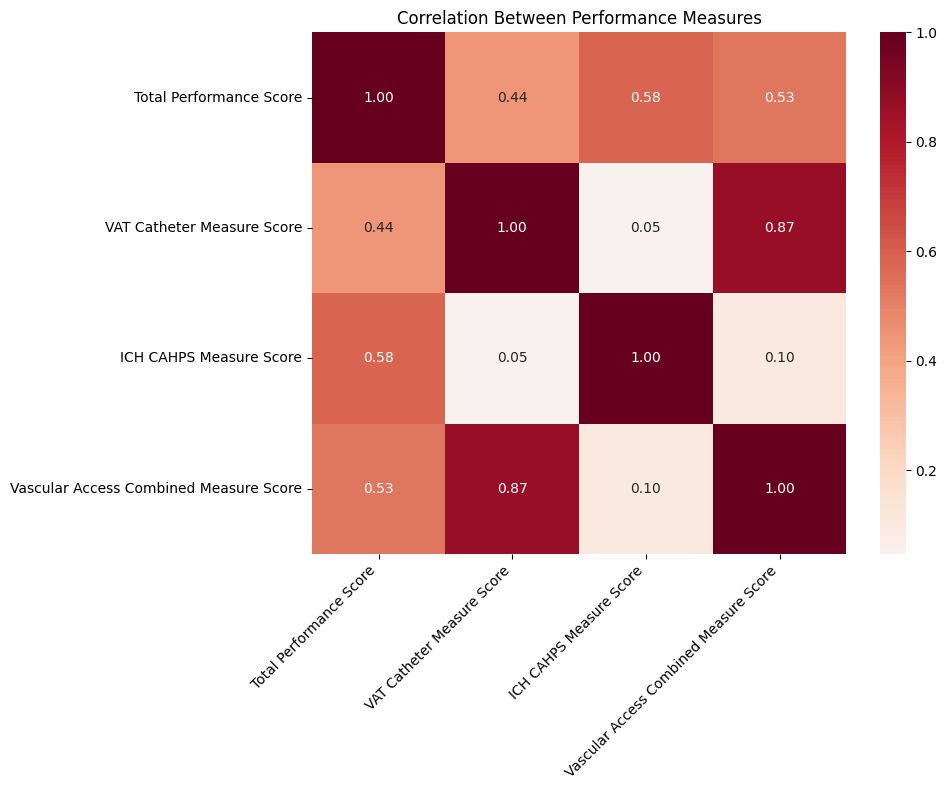

In [26]:
#code to create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
   df_corr.corr(),
   annot=True,
   cmap='RdBu_r',
   center=0,
   fmt='.2f'
)
plt.title('Correlation Between Performance Measures')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()#display graph
